In [78]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# The Center for World University Rankings Data
cwur_Data = pd.read_csv('../Data/UniRanking/cwurData.csv')

# The Academic Ranking of World Universities (Shanghai Ranking)
shanghai_data = pd.read_csv(open('../Data/UniRanking/shanghaiData.csv', "r"), sep=",")

# The Times Higher Education World University Ranking
times_data = pd.read_csv('../Data/UniRanking/timesData.csv')

education_expenditure = pd.read_csv(open('../Data/UniRanking/education_expenditure_supplementary_data.csv', "r"), sep=",")

education_attainment = pd.read_csv(open('../Data/UniRanking/educational_attainment_supplementary_data.csv', "r"), sep=",")

school_country = pd.read_csv('../Data/UniRanking/school_and_country_table.csv')

In [3]:
#print(cwur_Data.info())
#print(cwu_rData.isnull().sum())
#cwur_Data.head()

In [4]:
#print(shanghai_data.info())
#print(shanghai_data.isnull().sum())
#shanghai_data.head()

In [5]:
#times_data.info()
#print(times_data.isnull().sum())
#times_data.head()

In [6]:
#education_expenditure.info()
#print(education_expenditure.isnull().sum())
#education_expenditure.head()

In [7]:
education_attainment.info()
#print(education_attainment.isnull().sum())
#education_attainment.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79055 entries, 0 to 79054
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  79052 non-null  object 
 1   series_name   79050 non-null  object 
 2   1985          51843 non-null  float64
 3   1986          12 non-null     float64
 4   1987          3 non-null      float64
 5   1990          51846 non-null  float64
 6   1991          1 non-null      float64
 7   1992          3 non-null      float64
 8   1993          1 non-null      float64
 9   1995          51884 non-null  float64
 10  1996          3 non-null      float64
 11  1997          0 non-null      float64
 12  1998          47 non-null     float64
 13  1999          9 non-null      float64
 14  2000          51970 non-null  float64
 15  2001          225 non-null    float64
 16  2002          184 non-null    float64
 17  2003          55 non-null     float64
 18  2004          137 non-null

In [8]:
#print(school_country.info())
#print(school_country.isnull().sum())
#school_country.head()

In [9]:
'''
print('cwur_Data')
print(cwur_Data.info())
print('shanghai_data')
print(shanghai_data.info())
print('times_data')
print(times_data.info())

print('education_expenditure')
print(education_expenditure.info())
print('education_attainment')
print(education_attainment.info())
print('school_country')
print(school_country.info())
'''


"\nprint('cwur_Data')\nprint(cwur_Data.info())\nprint('shanghai_data')\nprint(shanghai_data.info())\nprint('times_data')\nprint(times_data.info())\n\nprint('education_expenditure')\nprint(education_expenditure.info())\nprint('education_attainment')\nprint(education_attainment.info())\nprint('school_country')\nprint(school_country.info())\n"

In [10]:
print(cwur_Data['broad_impact'].isnull().sum())

missing_rows = cwur_Data[cwur_Data['broad_impact'].isna()]
missing_rows.head()

#this is just to validate data with some university

#tempRow = cwur_Data[cwur_Data['institution'] == 'Harvard University' ]
#tempRow
tempRow = cwur_Data[cwur_Data['institution'].isin(['University of Helsinki','Harvard University']) ].sort_values(by='institution')
tempRow

200


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
100,1,Harvard University,USA,1,1,1,1,1,1,1,NaN,7,100.00,2013
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
1200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.00,2015
88,89,University of Helsinki,Finland,1,96,101,79,62,64,54,NaN,101,44.44,2012
197,98,University of Helsinki,Finland,1,69,101,81,74,79,71,NaN,101,44.39,2013
309,110,University of Helsinki,Finland,1,53,478,77,80,88,99,74.0,481,50.76,2014
1310,111,University of Helsinki,Finland,1,56,551,111,80,79,88,65.0,420,50.04,2015


In [11]:
#Calculate mean by university & year
mean_values = cwur_Data.groupby('institution')['broad_impact'].transform('mean')

#fill missing value
cwur_Data['broad_impact'] = cwur_Data['broad_impact'].fillna(mean_values)

#print(cwur_Data['broad_impact'].isnull().sum())

In [12]:
missing_rows = cwur_Data[cwur_Data['broad_impact'].isna()]
#print(missing_rows)


In [13]:
# Directly assign the value 0 to 'broad_impact' for 'Williams College' as it is not working with generically
cwur_Data.loc[cwur_Data['institution'] == 'Williams College', 'broad_impact'] = 0

In [14]:
print(cwur_Data['broad_impact'].isnull().sum())

#this is just to validate data with some university

#tempRow = cwur_Data[cwur_Data['institution'] == 'Harvard University' ]
#tempRow
tempRow = cwur_Data[cwur_Data['institution'].isin(['University of Helsinki','Harvard University']) ].sort_values(by='institution')
#tempRow


0


In [36]:
cwur_Data
#print(cwur_Data.info())

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,1.0,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,2.0,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,4.0,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,13.0,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,24.5,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [50]:
#average publications, citations, patents and score by country to identify trends
country_avg_score = cwur_Data.groupby('country')[['publications','citations','patents','score']].mean()
#print(country_avg_score)

# For the time being it is fine. Later I will have to do the analysis among and respective ploting

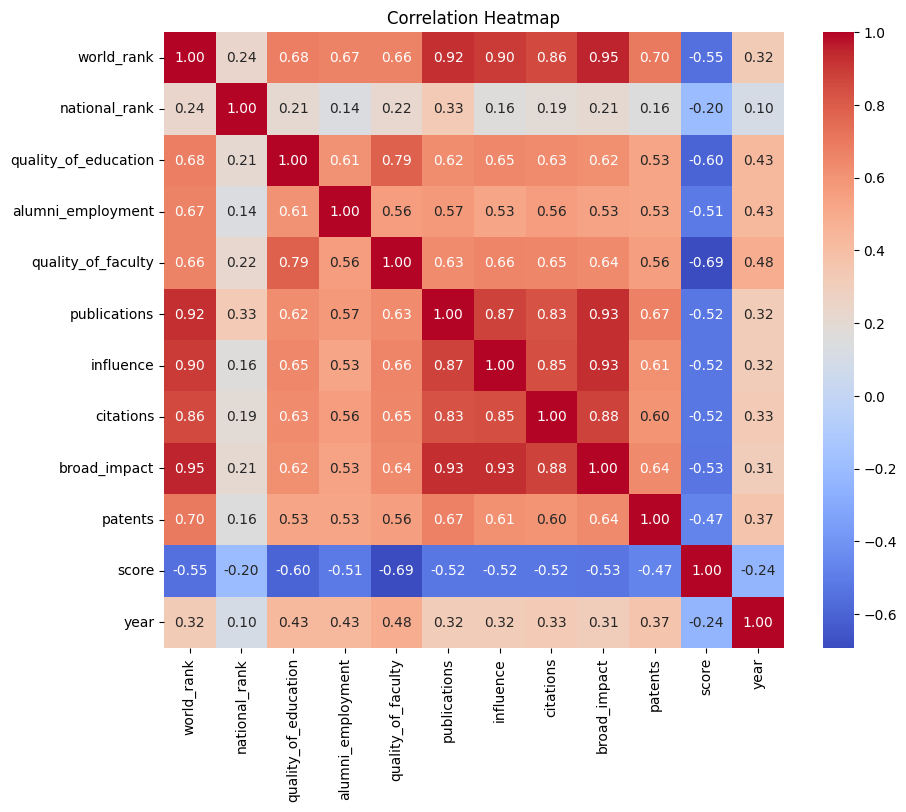

In [79]:
# Select only Numeric Columns to check the correclation

numeric_cols = cwur_Data.select_dtypes(include=['number'])
correlation_matrix = numeric_cols.corr()
#correlation_matrix

# For the time being it is fine. Later I will havwe to do the correclation analysis among the variables and respective ploting

#Investigate relationships between variables using a correlation heatmap:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [83]:
# List the top 10 universities based on world rank:
top_10_uni = cwur_Data[cwur_Data['world_rank'] <=10 ]
top_10_uni


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,1.0,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,2.0,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,4.0,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,13.0,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,24.5,18,85.21,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,37.0,101,82.50,2012
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,10.5,26,82.34,2012
7,8,Yale University,USA,6,14,31,12,14,6,15,19.5,66,79.14,2012
8,9,Columbia University,USA,7,23,21,10,13,12,14,12.5,5,78.86,2012
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,7.0,16,78.55,2012


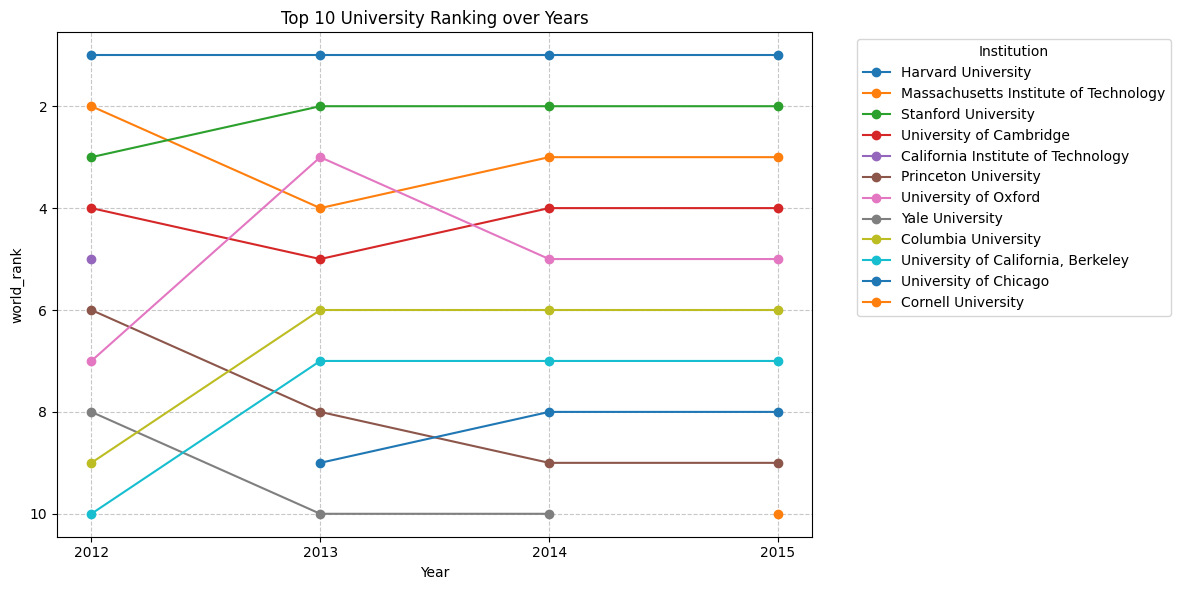

In [66]:
# Visulaize Top-10 universities over the years with a line plot to show trends in world rankings
plt.figure(figsize=(12, 6))
for institution in top_10_uni['institution'].unique():
    subset = top_10_uni[top_10_uni['institution'] == institution]
    plt.plot(subset['year'], subset['world_rank'], marker='o', label=institution)

subset

plt.gca().invert_yaxis()   # Invert rank axis (1 is the best axis)
plt.xticks(sorted(top_10_uni['year'].unique())) # to show only availabe values

plt.xlabel('Year')
plt.ylabel('world_rank')
plt.title('Top 10 University Ranking over Years')

plt.legend(title='Institution', bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(True, linestyle ='--',alpha=0.7)
plt.tight_layout()
plt.show()
    

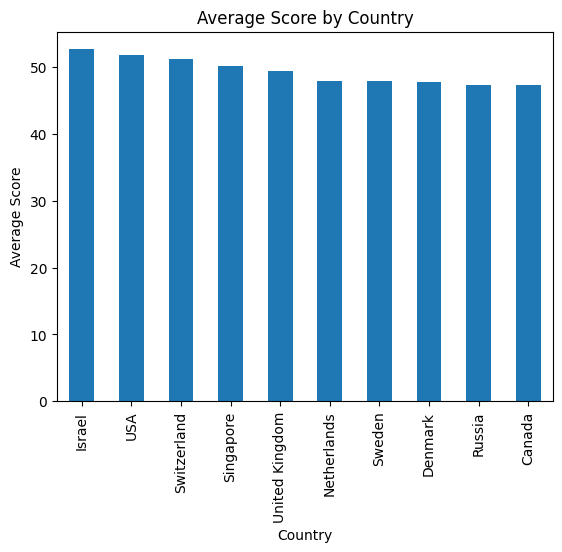

In [69]:
country_scores = cwur_Data.groupby('country')['score'].mean().sort_values(ascending=False)
#print(country_scores)

country_scores.head(10).plot(kind='bar', title='Average Score by Country')
plt.xlabel('Country')
plt.ylabel('Average Score')
plt.show()

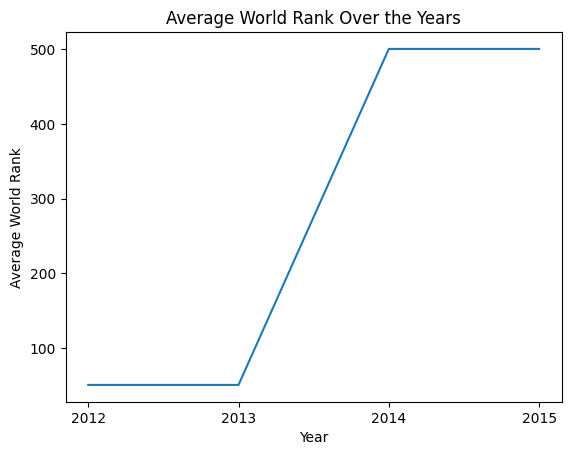

In [72]:
yearly_avg_rank = cwur_Data.groupby('year')['world_rank'].mean()
yearly_avg_rank.plot(kind='line', title='Average World Rank Over the Years')
plt.xticks(sorted(top_10_uni['year'].unique())) # to show only availabe values
plt.xlabel('Year')
plt.ylabel('Average World Rank')
plt.show()

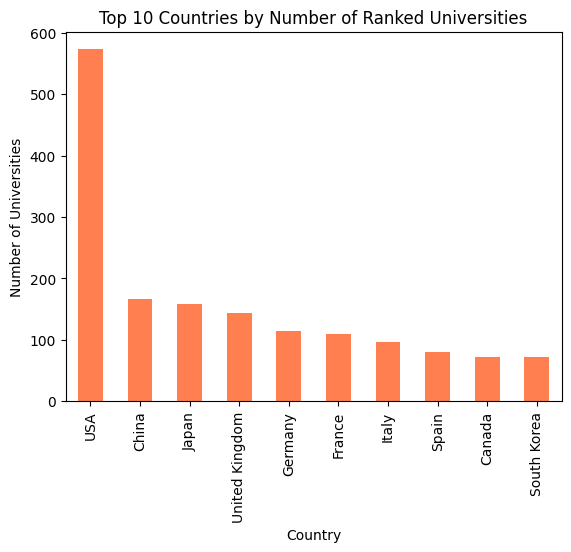

In [75]:
# Country Rankings: which countries dominate the rankings
top_countries = cwur_Data['country'].value_counts().head(10)
top_countries.plot(kind='bar', title='Top 10 Countries by Number of Ranked Universities', color='coral')
plt.xlabel('Country')
plt.ylabel('Number of Universities')
plt.show()

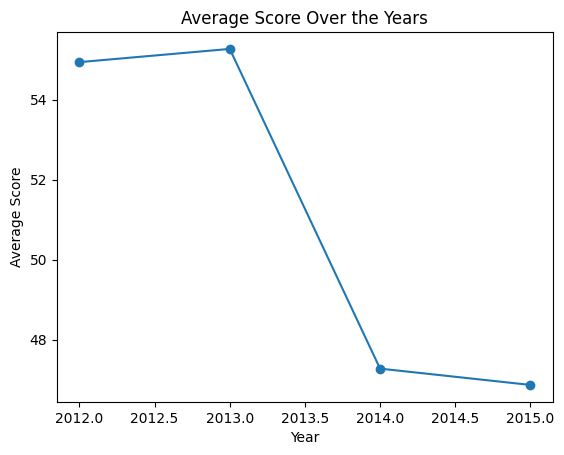

In [77]:
#Examine how the scores have changed over the years:
yearly_avg_score = cwur_Data.groupby('year')['score'].mean()
yearly_avg_score.plot(kind='line', title='Average Score Over the Years', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.show()

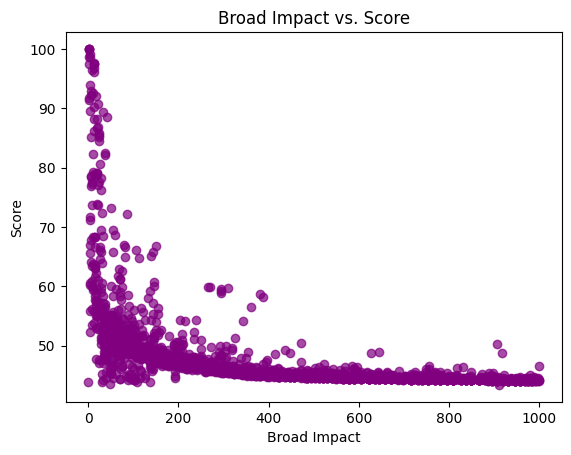

In [84]:
# Explore the relationship between broad_impact and score:
plt.scatter(cwur_Data['broad_impact'], cwur_Data['score'], alpha=0.7, color='purple')
plt.title('Broad Impact vs. Score')
plt.xlabel('Broad Impact')
plt.ylabel('Score')
plt.show()

In [27]:
# Extract year columns dynamically
year_column = education_expenditure.columns[education_expenditure.columns.str.match(r'^\d{4}$')]
#print(year_column)

In [28]:
#education_expenditure

In [33]:
def fill_missing_value_education_expenditure(group):

    # Loop through all the columns to extract relevant rows from column 'direct_expenditure_type'
    for year in year_column:
        public_val = group.loc[group['direct_expenditure_type'] == 'Public', year].squeeze()
        private_val = group.loc[group['direct_expenditure_type'] == 'Private', year].squeeze()
        total_val = group.loc[group['direct_expenditure_type'] == 'Total', year].squeeze()

        # fill missing value: considering 95% Public and 5% Private contribution

        # Case 1: Total is present, Public and Private are missing
        if not pd.isna(total_val) and pd.isna(public_val) and pd.isna(private_val):
            group.loc[group['direct_expenditure_type'] == 'Public', year] = total_val * 0.95
            group.loc[group['direct_expenditure_type'] == 'Private', year] = total_val * 0.05

        # Case 2: Public is present, Private and Total are missing
        elif not pd.isna(public_val) and pd.isna(private_val) and pd.isna(total_val):
            total_calculate = public_val / 0.95
            group.loc[group['direct_expenditure_type'] == 'Total', year] = total_calculate
            group.loc[group['direct_expenditure_type'] == 'Private', year] = total_calculate * 0.05

        # Case 3: Private is available, Public and Total are missing
        elif not pd.isna(private_val) and pd.isna(public_val) and pd.isna(total_val):
            total_calculate = private_val / 0.05
            group.loc[group['direct_expenditure_type'] == 'Total', year] = total_calculate
            group.loc[group['direct_expenditure_type'] == 'Public', year] = total_calculate * 0.95

        # Case 4: Two values are present
        if pd.isna(total_val) and not pd.isna(public_val) and not pd.isna(private_val):
            group.loc[group['direct_expenditure_type'] == 'Total', year] = public_val + private_val
        elif pd.isna(private_val) and not pd.isna(total_val) and not pd.isna(public_val):
            group.loc[group['direct_expenditure_type'] == 'Private', year] = total_val - public_val
        elif pd.isna(public_val) and not pd.isna(total_val) and not pd.isna(private_val):
            group.loc[group['direct_expenditure_type'] == 'Public', year] = total_val - private_val

    # Now handle Case 5: All three values are missing
    for year in year_column:
        public_val = group.loc[group['direct_expenditure_type'] == 'Public', year].squeeze()
        private_val = group.loc[group['direct_expenditure_type'] == 'Private', year].squeeze()
        total_val = group.loc[group['direct_expenditure_type'] == 'Total', year].squeeze()

        # Case 5: All three values are missing
        if pd.isna(total_val) and pd.isna(public_val) and pd.isna(private_val):
            # Calculate averages from available years within the group
            avg_pub = group.loc[group['direct_expenditure_type'] == 'Public', year_column].mean(axis=1).squeeze()
            avg_pri = group.loc[group['direct_expenditure_type'] == 'Private', year_column].mean(axis=1).squeeze()
            avg_tot = avg_pub + avg_pri

            # Fill values using historical averages
            group.loc[group['direct_expenditure_type'] == 'Public', year] = avg_pub if not pd.isna(avg_pub) else 0.95 * avg_tot
            group.loc[group['direct_expenditure_type'] == 'Private', year] = avg_pri if not pd.isna(avg_pri) else 0.05 * avg_tot
            group.loc[group['direct_expenditure_type'] == 'Total', year] =  avg_tot
            
    return group

education_expenditure = education_expenditure.groupby(
    ['country', 'institute_type'], group_keys=False
).apply(fill_missing_value_education_expenditure)

print(education_expenditure)


                  country                  institute_type  \
0            OECD Average               All Institutions    
1               Australia               All Institutions    
2                 Austria               All Institutions    
3                 Belgium               All Institutions    
4                  Canada               All Institutions    
..                    ...                             ...   
328                Turkey  Higher Education Institutions    
329        United Kingdom  Higher Education Institutions    
330         United States  Higher Education Institutions    
331                Brazil  Higher Education Institutions    
332    Russian Federation  Higher Education Institutions    

    direct_expenditure_type      1995      2000      2005      2009      2010  \
0                    Public  4.900000  4.900000  5.000000  5.400000  5.400000   
1                    Public  4.500000  4.600000  4.300000  4.500000  4.600000   
2                    Pub

C:\Users\Dinesh Thakur\AppData\Local\Temp\ipykernel_2952\3516154523.py:58: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).apply(fill_missing_value_education_expenditure)


In [30]:
#print(education_expenditure.columns)

In [34]:
edu_expend = pd.melt(education_expenditure,
                  id_vars=['country', 'institute_type', 'direct_expenditure_type'],
                  value_vars=year_column,  # year columns to melt
                  var_name='year',  # Name for the 'melted' columns
                  value_name='expenditure_value'  # Name for the values in melted columns
                 )
edu_expend['expenditure_value'] = edu_expend['expenditure_value'].round(2)
print(edu_expend.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  1998 non-null   object 
 1   institute_type           1998 non-null   object 
 2   direct_expenditure_type  1998 non-null   object 
 3   year                     1998 non-null   object 
 4   expenditure_value        1998 non-null   float64
dtypes: float64(1), object(4)
memory usage: 78.2+ KB
None


In [32]:
edu_expend

,country,institute_type,direct_expenditure_type,year,expenditure_value
0,OECD Average,All Institutions,Public,1995,4.90
1,Australia,All Institutions,Public,1995,4.50
2,Austria,All Institutions,Public,1995,5.30
3,Belgium,All Institutions,Public,1995,5.00
4,Canada,All Institutions,Public,1995,5.80
...,...,...,...,...,...
1993,Turkey,Higher Education Institutions,Total,2011,0.95
1994,United Kingdom,Higher Education Institutions,Total,2011,1.20
1995,United States,Higher Education Institutions,Total,2011,2.70
1996,Brazil,Higher Education Institutions,Total,2011,0.95
